In [1]:
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
####Data Loading
data = loadmat('YaleB_32x32')
features = data['fea']
labels = data['gnd']
print(len(features), len(labels))
X = features
y = labels

2414 2414


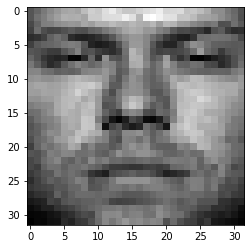

In [3]:
###testing Loaded data
import matplotlib.pyplot as plt
import cv2

t= features[1].transpose()
img = t.reshape(32,32).astype(np.uint8).transpose()

plt.imshow(img, cmap='gray')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1361.53it/s]
d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1587.69it/s]
d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1411.24it/s]
d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

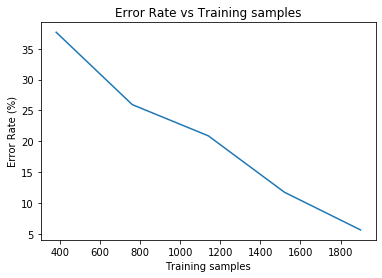

In [108]:
#####Error rate vs training samples

ns = np.array([10,20,30,40,50])
train_samples = 38*ns
error_all = []
for n in tqdm(ns):
    X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
    for num in tqdm(range(1,39)):
        idx = np.where(labels == num)
        idx = idx[0]
        X = features[idx]
        y = labels[idx]
        x_tr, x_te, y_tr, y_te = \
                train_test_split(X,y, train_size=n, random_state=42)
        X_tr.append(x_tr)
        X_te.append(x_te)
        Y_tr.append(y_tr)
        Y_te.append(y_te)
        
    X_train,X_test,y_train,y_test = [],[],[],[]
    
    for i in X_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_train.append(t)
    for i in X_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_test.append(t)
    #print(len(X_train),len(X_test))
    for i in Y_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_train.append(t)
    for i in Y_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_test.append(t)
    #print(len(y_train),len(y_test))
    
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors=1,metric = 'euclidean')
    clf.fit(X_train, y_train)
    
    #y_pred = clf.predict(X_test)
    err = clf.score(X_test,y_test)
    error = 100*(1-err)
    error_all.append(error)

plt.plot(train_samples,error_all)
plt.title('Error Rate vs Training samples')
plt.xlabel('Training samples')
plt.ylabel('Error Rate (%)')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1731.58it/s]
d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1411.19it/s]
d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1154.58it/s]
d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

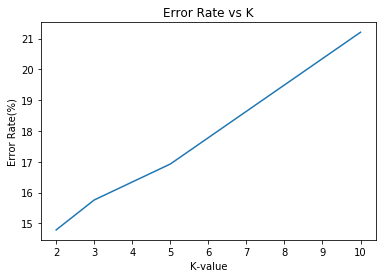

In [109]:
###Error rate vs k
ks = np.array([2,3,5,10])
error_all = []
for k in tqdm(ks):
    X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
    for num in tqdm(range(1,39)):
        idx = np.where(labels == num)
        idx = idx[0]
        X = features[idx]
        y = labels[idx]
        x_tr, x_te, y_tr, y_te = \
                train_test_split(X,y, train_size=50, random_state=42)
        X_tr.append(x_tr)
        X_te.append(x_te)
        Y_tr.append(y_tr)
        Y_te.append(y_te)
        
    X_train,X_test,y_train,y_test = [],[],[],[]
    
    for i in X_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_train.append(t)
    for i in X_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_test.append(t)
    #print(len(X_train),len(X_test))
    for i in Y_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_train.append(t)
    for i in Y_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_test.append(t)
    #print(len(y_train),len(y_test))
    
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    clf.fit(X_train, y_train)
    
    #y_pred = clf.predict(X_test)
    err = clf.score(X_test,y_test)
    error = 100*(1-err)
    error_all.append(error)

plt.plot(ks,error_all)
plt.title('Error Rate vs K')
plt.xlabel('K-value')
plt.ylabel('Error Rate(%)')
plt.show()

In [112]:
####Miscalssification computation
X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
for num in tqdm(range(1,39)):
    idx = np.where(labels == num)
    idx = idx[0]
    X = features[idx]
    y = labels[idx]
    x_tr, x_te, y_tr, y_te = \
            train_test_split(X,y, train_size=20, random_state=42)
    X_tr.append(x_tr)
    X_te.append(x_te)
    Y_tr.append(y_tr)
    Y_te.append(y_te)
        
X_train,X_test,y_train,y_test = [],[],[],[]
    
for i in X_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_train.append(t)
for i in X_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_test.append(t)
print(len(X_train),len(X_test))
for i in Y_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_train.append(t)
for i in Y_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_test.append(t)
print(len(y_train),len(y_test))
    
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
    
clf = KNeighborsClassifier(n_neighbors=2,metric = 'euclidean')
clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)
    
E = y_test-y_pred
e = np.diagonal(E)
#print(e)
err_idx = [idx for idx, val in enumerate(e) if val != 0] 
#print(err_idx)
err = clf.score(X_test,y_test)
error = 100*(1-err)
error_all.append(error)
#print(error)

100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1270.03it/s]


760 1654
760 1654


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[ 0  0  0 ...  0 20  0]
[14, 16, 17, 21, 28, 29, 30, 39, 45, 51, 58, 60, 61, 65, 72, 73, 74, 80, 82, 83, 86, 92, 94, 97, 98, 102, 104, 105, 113, 116, 117, 118, 119, 124, 127, 128, 130, 146, 148, 149, 160, 161, 162, 164, 168, 174, 182, 185, 186, 190, 192, 193, 197, 204, 205, 212, 234, 236, 237, 248, 249, 250, 256, 264, 267, 274, 277, 278, 279, 280, 281, 289, 291, 292, 293, 294, 295, 300, 303, 304, 306, 317, 322, 324, 325, 336, 337, 338, 339, 344, 346, 353, 362, 366, 368, 373, 377, 380, 381, 383, 390, 398, 401, 402, 405, 406, 407, 408, 410, 411, 412, 413, 417, 421, 423, 424, 425, 427, 430, 432, 435, 436, 438, 441, 450, 451, 452, 453, 455, 458, 460, 461, 463, 467, 469, 470, 473, 476, 486, 491, 493, 500, 503, 506, 511, 515, 520, 522, 524, 526, 528, 531, 532, 533, 537, 542, 546, 548, 554, 555, 559, 560, 568, 572, 573, 575, 576, 580, 587, 588, 589, 590, 595, 605, 606, 612, 614, 616, 617, 618, 619, 620, 623, 627, 629, 631, 633, 637, 639, 640, 644, 645, 648, 653, 654, 658, 660, 661, 662, 665, 

[ 57 707]


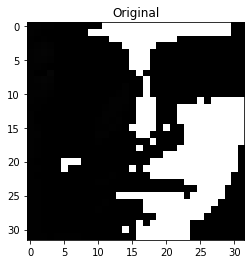

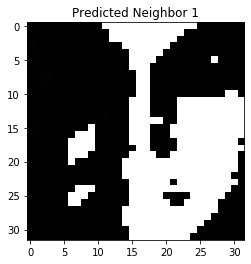

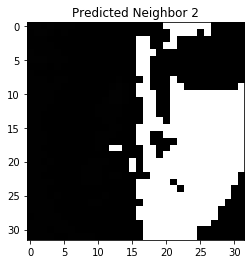

In [127]:
####Getting misclassifed images and plotting them
import matplotlib.pyplot as plt
import cv2

t = X_test[err_idx[20]]
nn = clf.kneighbors([t])
print(nn[1][0])
t_pred1 = X_train[nn[1][0][0]]
t_pred2 = X_train[nn[1][0][1]]

img = t.reshape(32,32).astype(np.uint8).transpose()
img_pred1 = t_pred1.reshape(32,32).astype(np.uint8).transpose()
img_pred2 = t_pred2.reshape(32,32).astype(np.uint8).transpose()
#cv2.imshow(img)

plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original')
plt.show()

plt.imshow(img_pred1, cmap=plt.cm.gray)
plt.title('Predicted Neighbor 1')
plt.show()
plt.imshow(img_pred2, cmap=plt.cm.gray)
plt.title('Predicted Neighbor 2')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1411.24it/s]


1140 1274
1140 1274


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [05:26<00:00, 81.69s/it]


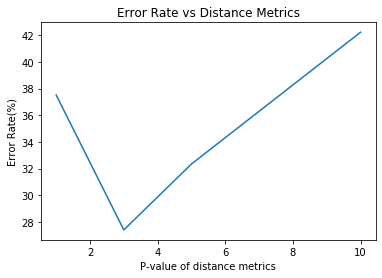

In [128]:
###Error rate vs distance metrics
def mydist(x, y,**metric_params):
    dist = LA.norm((x-y),metric_params["power"])
    return dist

X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
for num in tqdm(range(1,39)):
    idx = np.where(labels == num)
    idx = idx[0]
    X = features[idx]
    y = labels[idx]
    x_tr, x_te, y_tr, y_te = \
            train_test_split(X,y, train_size=30, random_state=42)
    X_tr.append(x_tr)
    X_te.append(x_te)
    Y_tr.append(y_tr)
    Y_te.append(y_te)
        
X_train,X_test,y_train,y_test = [],[],[],[]
    
for i in X_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_train.append(t)
for i in X_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_test.append(t)
print(len(X_train),len(X_test))
for i in Y_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_train.append(t)
for i in Y_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_test.append(t)
print(len(y_train),len(y_test))
    
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

error_all = []

ps = np.array([1,3,5,10])
for p in tqdm(ps):
    clf = KNeighborsClassifier(n_neighbors=3,metric=mydist, metric_params={"power": p})
    clf.fit(X_train, y_train)
    
    #y_pred = clf.predict(X_test)
    err = clf.score(X_test,y_test)
    error = 100*(1-err)
    error_all.append(error)
    
plt.plot(ps,error_all)
plt.title('Error Rate vs Distance Metrics')
plt.xlabel('P-value of distance metrics')
plt.ylabel('Error Rate(%)')
plt.show()

In [131]:
####Extracting HOG and LBP features
from skimage.feature import local_binary_pattern
from skimage.feature import hog
radius = 3
n_points = 8 * radius

lbp_features = []
hog_features = []
for i in features:
    img = i.reshape(32,32).transpose()
    lbp = local_binary_pattern(img, n_points,radius)
    lbp = lbp.flatten()
    hogf = hog(img)
    hog_f = hogf.flatten()
    lbp_features.append(lbp)
    hog_features.append(hogf)

In [132]:
#####LBP features and error rates for p = 1,2
def mydist(x, y,**metric_params):
    dist = LA.norm((x-y),metric_params["power"])
    return dist

X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
for num in tqdm(range(1,39)):
    idx = np.where(labels == num)
    idx = idx[0]
    X,y=[],[]
    for it in idx:
        X.append(lbp_features[it])
    y = labels[idx]
    x_tr, x_te, y_tr, y_te = \
            train_test_split(X,y, train_size=30, random_state=42)
    X_tr.append(x_tr)
    X_te.append(x_te)
    Y_tr.append(y_tr)
    Y_te.append(y_te)
        
X_train,X_test,y_train,y_test = [],[],[],[]
    
for i in X_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_train.append(t)
for i in X_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_test.append(t)
print(len(X_train),len(X_test))
for i in Y_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_train.append(t)
for i in Y_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_test.append(t)
print(len(y_train),len(y_test))
    
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

error_all_lbp = []

ps = np.array([1,2])
for p in tqdm(ps):
    clf = KNeighborsClassifier(n_neighbors=3,metric=mydist, metric_params={"power": p})
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    err = clf.score(X_test,y_test)
    error = 100*(1-err)
    error_all.append(error)
    print(error)
print(error_all_lbp)

100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 1905.13it/s]


1140 1274
1140 1274


 50%|██████████████████████████████████████████                                          | 1/2 [01:19<01:19, 79.24s/it]

0.3924646781789609


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:17<00:00, 68.70s/it]

0.6279434850863463
[]


In [134]:
#####HOG features and error rates for p = 1,2
def mydist(x, y,**metric_params):
    dist = LA.norm((x-y),metric_params["power"])
    return dist

X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
for num in tqdm(range(1,39)):
    idx = np.where(labels == num)
    idx = idx[0]
    X,y=[],[]
    for it in idx:
        X.append(hog_features[it])
    y = labels[idx]
    x_tr, x_te, y_tr, y_te = \
            train_test_split(X,y, train_size=30, random_state=42)
    X_tr.append(x_tr)
    X_te.append(x_te)
    Y_tr.append(y_tr)
    Y_te.append(y_te)
        
X_train,X_test,y_train,y_test = [],[],[],[]
    
for i in X_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_train.append(t)
for i in X_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        X_test.append(t)
print(len(X_train),len(X_test))
for i in Y_tr:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_train.append(t)
for i in Y_te:
    for j in range(0,len(i)):
        t = i[j].tolist()
        y_test.append(t)
print(len(y_train),len(y_test))
    
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

error_all_hog = []

ps = np.array([1,2])
for p in tqdm(ps):
    clf = KNeighborsClassifier(n_neighbors=3,metric=mydist, metric_params={"power": p})
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    err = clf.score(X_test,y_test)
    error = 100*(1-err)
    error_all.append(error)
    print(error)
    
print(error_all_hog)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


1140 1274
1140 1274


 50%|██████████████████████████████████████████                                          | 1/2 [01:07<01:07, 67.74s/it]

42.85714285714286


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:03<00:00, 61.76s/it]

43.01412872841445
[]


In [149]:
####training set and test set split
X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
for num in tqdm(range(1,39)):
    idx = np.where(labels == num)
    idx = idx[0]
    X = features[idx]
    y = labels[idx]
    x_tr, x_te, y_tr, y_te = \
            train_test_split(X,y, test_size=20, random_state=42)
    X_tr.append(x_tr)
    X_te.append(x_te)
    Y_tr.append(y_tr)
    Y_te.append(y_te)
        
    X_train,X_test,y_train,y_test = [],[],[],[]
    
    for i in X_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_train.append(t)
    for i in X_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_test.append(t)
    #print(len(X_train),len(X_test))
    for i in Y_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_train.append(t)
    for i in Y_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_test.append(t)
    #print(len(y_train),len(y_test))


















  0%|                                                                                           | 0/38 [00:00<?, ?it/s]














 26%|█████████████████████▌                                                            | 10/38 [00:00<00:00, 81.29it/s]














 39%|████████████████████████████████▎                                                 | 15/38 [00:00<00:00, 66.29it/s]














 50%|█████████████████████████████████████████                                         | 19/38 [00:00<00:00, 48.53it/s]














 61%|█████████████████████████████████████████████████▋                                | 23/38 [00:00<00:00, 36.39it/s]














 68%|████████████████████████████████████████████████████████                          | 26/38 [00:00<00:00, 29.17it/s]














 76%|██████████████████████████████████████████████████████████████▌                   | 29/38 [00:00<00:00, 24.43it/s]














 84%|██████████████████████████████████████████

In [151]:
print(len(X_test),len(y_test))
print(len(X_train),len(y_train))
#print(len(X_val),len(y_val))

760 760
1654 1654


In [155]:
####training and validation set split and updating parameters to get least error rate
def mydist(x, y,**metric_params):
    dist = LA.norm((x-y),metric_params["power"])
    return dist
ps = np.array(range(1,10))
p_sel = 1
k_sel = 1
err_curr = 1
X = X_train
y = y_train
for k in tqdm(range(1,40,2)):
    ##Train and Val set
    X_train, X_val, y_train, y_val = \
                train_test_split(X,y, test_size=0.20, random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    X_val = StandardScaler().fit_transform(X_val)
    print(p)
    for p in tqdm(ps):
        clf = KNeighborsClassifier(n_neighbors=k,metric=mydist, metric_params={"power": p})
        clf.fit(X_train, y_train)
        err = 1-clf.score(X_val,y_val)
        print(err)
        if(err<err_curr):
            p_sel = p;
            err_curr = err;
    clf = KNeighborsClassifier(n_neighbors=k,metric=mydist, metric_params={"power": p_sel})
    clf.fit(X_train, y_train)
    err = 1-clf.score(X_val,y_val)
    print(err)
    if(err<err_curr):
        k_sel = k;
        err_curr = err;




















  0%|                                                                                           | 0/20 [00:00<?, ?it/s]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


1






















 11%|█████████▎                                                                          | 1/9 [00:10<01:23, 10.40s/it]

0.4952830188679245


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:19<01:10, 10.11s/it]

0.37264150943396224


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:51<01:39, 16.57s/it]

0.3443396226415094


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [01:22<01:44, 20.99s/it]d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.34905660377358494






















 56%|██████████████████████████████████████████████▋                                     | 5/9 [01:55<01:37, 24.43s/it]

0.35377358490566035


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [02:27<01:20, 26.69s/it]

0.3632075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [02:59<00:56, 28.37s/it]

0.34905660377358494


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [03:31<00:29, 29.45s/it]

0.3584905660377359


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:03<00:00, 27.10s/it]

0.37264150943396224



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















  5%|████                                                                            | 1/20 [04:35<1:27:06, 275.09s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.3443396226415094
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:11<01:33, 11.70s/it]

0.6132075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:20<01:15, 10.82s/it]

0.5283018867924528


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:52<01:42, 17.08s/it]

0.4764150943396226


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [01:22<01:45, 21.17s/it]

0.49056603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [01:54<01:36, 24.16s/it]

0.4716981132075472


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [02:25<01:18, 26.27s/it]

0.49056603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [02:56<00:55, 27.66s/it]

0.5141509433962264


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [03:25<00:28, 28.15s/it]

0.5235849056603774


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:56<00:00, 26.26s/it]

0.5377358490566038



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 10%|████████                                                                        | 2/20 [08:59<1:21:36, 272.01s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.4764150943396226
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:10<01:27, 10.90s/it]

0.6132075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:20<01:13, 10.51s/it]

0.48584905660377353


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:47<01:33, 15.52s/it]

0.4811320754716981


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [01:17<01:39, 19.83s/it]

0.48584905660377353


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [01:48<01:32, 23.20s/it]

0.5094339622641509


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [02:19<01:16, 25.57s/it]

0.5330188679245282


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [02:51<00:54, 27.45s/it]

0.5471698113207547


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [03:19<00:27, 27.62s/it]

0.5849056603773585


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:50<00:00, 25.66s/it]

0.5943396226415094



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 15%|████████████                                                                    | 3/20 [13:22<1:16:15, 269.12s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.4811320754716981
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:10<01:25, 10.64s/it]

0.5990566037735849


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:20<01:12, 10.41s/it]

0.4811320754716981


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:52<01:41, 16.84s/it]

0.5094339622641509


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [01:23<01:45, 21.04s/it]

0.49056603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [01:54<01:35, 23.97s/it]

0.5047169811320755


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [02:24<01:17, 25.93s/it]

0.5518867924528301


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [02:54<00:54, 27.19s/it]

0.5613207547169812


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [03:25<00:28, 28.19s/it]

0.6132075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:55<00:00, 26.14s/it]

0.6273584905660378



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 20%|████████████████                                                                | 4/20 [17:48<1:11:29, 268.12s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5094339622641509
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:12<01:36, 12.09s/it]

0.5754716981132075


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:21<01:18, 11.28s/it]

0.5330188679245282


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:51<01:41, 16.91s/it]

0.5235849056603774


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [01:21<01:43, 20.80s/it]

0.4952830188679245


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [01:40<01:21, 20.27s/it]

0.5235849056603774


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [01:52<00:53, 17.89s/it]

0.5660377358490566


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [02:06<00:33, 16.57s/it]

0.5849056603773585


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [02:18<00:15, 15.34s/it]

0.6179245283018868


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:31<00:00, 16.86s/it]

0.6320754716981132



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 25%|████████████████████▌                                                             | 5/20 [20:32<59:13, 236.91s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5235849056603774
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:33,  4.23s/it]

0.5660377358490566


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:07<00:28,  4.04s/it]

0.5566037735849056


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:20<00:38,  6.50s/it]

0.5283018867924528


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:32<00:41,  8.32s/it]

0.49056603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:46<00:40, 10.06s/it]

0.5235849056603774


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:59<00:32, 10.81s/it]

0.5849056603773585


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:11<00:22, 11.28s/it]

0.6132075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:23<00:11, 11.53s/it]

0.6084905660377358


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:36<00:00, 10.70s/it]

0.6179245283018868



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 30%|████████████████████████▌                                                         | 6/20 [22:20<46:18, 198.44s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5283018867924528
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:33,  4.16s/it]

0.5943396226415094


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:07<00:27,  3.96s/it]

0.570754716981132


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:19<00:38,  6.34s/it]

0.5235849056603774


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:32<00:42,  8.41s/it]

0.5377358490566038


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:44<00:37,  9.44s/it]

0.5424528301886793


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:56<00:30, 10.20s/it]

0.6037735849056604


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:08<00:21, 10.80s/it]

0.6320754716981132


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:20<00:11, 11.14s/it]

0.6320754716981132


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:33<00:00, 10.39s/it]

0.6320754716981132



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 35%|████████████████████████████▋                                                     | 7/20 [24:06<36:57, 170.57s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5235849056603774
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:34,  4.32s/it]

0.6037735849056604


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:07<00:28,  4.06s/it]

0.5990566037735849


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:19<00:38,  6.48s/it]

0.5518867924528301


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:31<00:40,  8.16s/it]

0.5660377358490566


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:44<00:37,  9.48s/it]

0.5566037735849056


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:56<00:30, 10.21s/it]

0.6132075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:08<00:21, 10.70s/it]

0.6462264150943396


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:21<00:11, 11.48s/it]

0.6462264150943396


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:33<00:00, 10.40s/it]

0.6320754716981132



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 40%|████████████████████████████████▊                                                 | 8/20 [25:52<30:15, 151.29s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5518867924528301
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:32,  4.10s/it]

0.5849056603773585


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:07<00:27,  3.99s/it]

0.5990566037735849


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:19<00:38,  6.40s/it]

0.5566037735849056


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:32<00:40,  8.18s/it]

0.5471698113207547


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:44<00:38,  9.54s/it]

0.5660377358490566


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:58<00:32, 10.87s/it]

0.6179245283018868


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:11<00:22, 11.48s/it]

0.6556603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:24<00:11, 11.85s/it]

0.6650943396226415


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:37<00:00, 10.84s/it]

0.6462264150943396



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 45%|████████████████████████████████████▉                                             | 9/20 [27:43<25:31, 139.24s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5566037735849056
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:38,  4.78s/it]

0.6226415094339622


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:08<00:32,  4.61s/it]

0.5849056603773585


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:21<00:42,  7.07s/it]

0.5613207547169812


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:33<00:42,  8.55s/it]

0.5613207547169812


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:46<00:38,  9.65s/it]

0.5660377358490566


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:57<00:30, 10.28s/it]

0.6462264150943396


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:09<00:21, 10.69s/it]

0.6650943396226415


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:22<00:11, 11.26s/it]

0.6698113207547169


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:34<00:00, 10.52s/it]

0.6650943396226415



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 50%|████████████████████████████████████████▌                                        | 10/20 [29:32<21:39, 129.94s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5613207547169812
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:35,  4.47s/it]

0.6179245283018868


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:08<00:29,  4.20s/it]

0.5801886792452831


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:20<00:39,  6.56s/it]

0.5566037735849056


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:34<00:44,  8.82s/it]

0.5660377358490566


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:46<00:39,  9.95s/it]

0.5990566037735849


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:59<00:32, 10.68s/it]

0.6320754716981132


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:11<00:22, 11.18s/it]

0.6745283018867925


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:23<00:11, 11.53s/it]

0.6886792452830188


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:36<00:00, 10.71s/it]

0.6650943396226415



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 55%|████████████████████████████████████████████▌                                    | 11/20 [31:21<18:33, 123.71s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5566037735849056
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:35,  4.38s/it]

0.6462264150943396


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:08<00:29,  4.21s/it]

0.6084905660377358


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:21<00:41,  6.84s/it]

0.5849056603773585


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:33<00:42,  8.57s/it]

0.5566037735849056


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:46<00:39,  9.78s/it]

0.5943396226415094


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:59<00:32, 10.69s/it]

0.6367924528301887


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:12<00:23, 11.52s/it]

0.6556603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:24<00:11, 11.62s/it]

0.6839622641509434


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:37<00:00, 10.78s/it]

0.6839622641509434



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 60%|████████████████████████████████████████████████▌                                | 12/20 [33:10<15:54, 119.36s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5849056603773585
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:32,  4.10s/it]

0.6509433962264151


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:07<00:27,  3.98s/it]

0.6179245283018868


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:20<00:39,  6.55s/it]

0.5943396226415094


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:32<00:40,  8.19s/it]

0.5613207547169812


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:44<00:37,  9.46s/it]

0.6037735849056604


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:57<00:30, 10.31s/it]

0.6462264150943396


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:09<00:21, 10.93s/it]

0.6745283018867925


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:22<00:11, 11.59s/it]

0.6981132075471699


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:34<00:00, 10.55s/it]

0.6981132075471699



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 65%|████████████████████████████████████████████████████▋                            | 13/20 [34:58<13:30, 115.83s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5943396226415094
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:37,  4.69s/it]

0.6556603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:08<00:31,  4.44s/it]

0.6415094339622642


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:21<00:42,  7.04s/it]

0.5896226415094339


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:36<00:46,  9.38s/it]

0.5518867924528301


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:49<00:42, 10.51s/it]

0.6179245283018868


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [01:01<00:32, 10.96s/it]

0.6603773584905661


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:13<00:22, 11.25s/it]

0.6839622641509434


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:26<00:11, 11.60s/it]

0.6933962264150944


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:38<00:00, 10.96s/it]

0.7169811320754718



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 70%|████████████████████████████████████████████████████████▋                        | 14/20 [36:49<11:26, 114.45s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5896226415094339
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:05<00:42,  5.33s/it]

0.6509433962264151


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:09<00:34,  4.88s/it]

0.6415094339622642


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:22<00:43,  7.30s/it]

0.5943396226415094


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:35<00:45,  9.08s/it]

0.5660377358490566


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:46<00:39,  9.83s/it]

0.6132075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:59<00:31, 10.57s/it]

0.679245283018868


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:11<00:22, 11.12s/it]

0.6933962264150944


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:23<00:11, 11.47s/it]

0.6933962264150944


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:36<00:00, 10.72s/it]

0.7264150943396226



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [38:38<09:24, 112.84s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5943396226415094
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:39,  4.98s/it]

0.6367924528301887


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:09<00:32,  4.69s/it]

0.6226415094339622


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:22<00:44,  7.44s/it]

0.5990566037735849


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:37<00:48,  9.60s/it]

0.5896226415094339


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:50<00:42, 10.51s/it]

0.6462264150943396


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [01:02<00:33, 11.10s/it]

0.6933962264150944


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:14<00:22, 11.44s/it]

0.7028301886792453


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:27<00:11, 11.69s/it]

0.7028301886792453


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:39<00:00, 11.03s/it]

0.7169811320754718



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [40:30<07:29, 112.49s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.5990566037735849
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:35,  4.40s/it]

0.6509433962264151


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:07<00:28,  4.11s/it]

0.6226415094339622


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:19<00:38,  6.43s/it]

0.6037735849056604


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:31<00:39,  7.95s/it]

0.5943396226415094


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:43<00:36,  9.12s/it]

0.6415094339622642


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:54<00:29,  9.87s/it]

0.7122641509433962


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:06<00:20, 10.36s/it]

0.7264150943396226


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:18<00:10, 10.88s/it]

0.7216981132075472


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:30<00:00, 10.04s/it]

0.7122641509433962



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [42:12<05:28, 109.42s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.6037735849056604
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:32,  4.05s/it]

0.6745283018867925


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:07<00:27,  3.94s/it]

0.6179245283018868


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:19<00:37,  6.32s/it]

0.6084905660377358


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:32<00:41,  8.21s/it]

0.5990566037735849


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:45<00:38,  9.64s/it]

0.6556603773584906


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:57<00:31, 10.45s/it]

0.7216981132075472


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:09<00:21, 10.89s/it]

0.7264150943396226


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:21<00:11, 11.33s/it]

0.7264150943396226


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:33<00:00, 10.43s/it]

0.7028301886792453



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [43:58<03:37, 108.54s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.6084905660377358
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:05<00:41,  5.14s/it]

0.6886792452830188


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:09<00:33,  4.82s/it]

0.6226415094339622


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:23<00:45,  7.55s/it]

0.6226415094339622


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:35<00:44,  8.99s/it]

0.6132075471698113


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:47<00:39,  9.92s/it]

0.6698113207547169


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:59<00:31, 10.49s/it]

0.7216981132075472


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:11<00:22, 11.05s/it]

0.7264150943396226


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:23<00:11, 11.40s/it]

0.7311320754716981


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:35<00:00, 10.63s/it]

0.7028301886792453



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [45:47<01:48, 108.46s/it]



















  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

0.6226415094339622
9


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 11%|█████████▎                                                                          | 1/9 [00:04<00:37,  4.67s/it]

0.6886792452830188


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 22%|██████████████████▋                                                                 | 2/9 [00:08<00:30,  4.30s/it]

0.6320754716981132


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 33%|████████████████████████████                                                        | 3/9 [00:20<00:40,  6.74s/it]

0.6367924528301887


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 44%|█████████████████████████████████████▎                                              | 4/9 [00:32<00:41,  8.34s/it]

0.6273584905660378


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:44<00:37,  9.48s/it]

0.6981132075471699


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 67%|████████████████████████████████████████████████████████                            | 6/9 [00:57<00:31, 10.35s/it]

0.7358490566037736


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:09<00:22, 11.00s/it]

0.7405660377358491


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:21<00:11, 11.37s/it]

0.7452830188679245


d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




















100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:34<00:00, 10.47s/it]

0.7216981132075472



d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



















100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [47:33<00:00, 142.67s/it]

0.6367924528301887


In [157]:
#####selected p and k
print(p_sel,k_sel)

3 1


In [158]:
####test data results for selected p & k
clf = KNeighborsClassifier(n_neighbors=k_sel,metric=mydist, metric_params={"power": p_sel})
clf.fit(X_train, y_train)
err = 1-clf.score(X_test,y_test)
print(err*100)

d:\studies\dl\hw\dcode\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


23.026315789473685
